### CODE TO PLOT THE NDVI, GNDVI, RENDVI, RECI

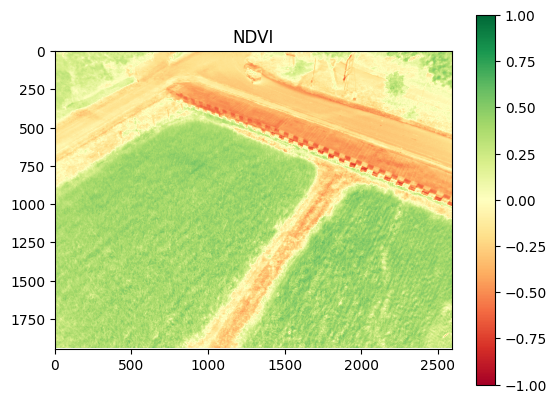

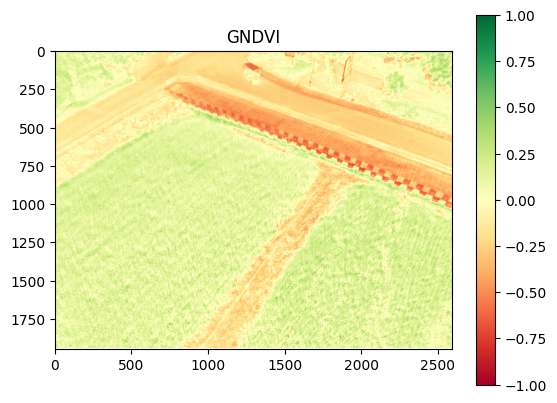

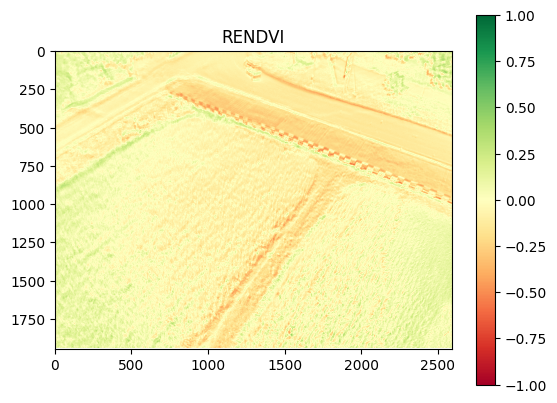

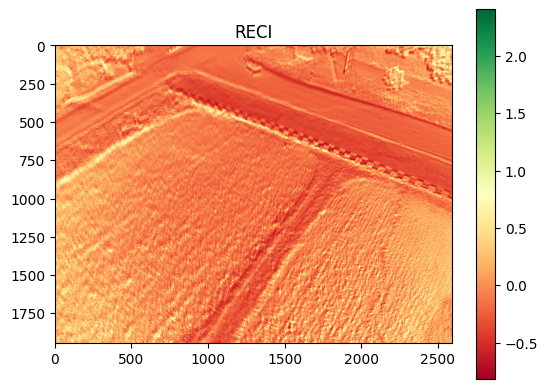

In [3]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Paths to your NIR, Red, Green, and Red-Edge band .TIF images
nir_path = 'DJI_20231017151911_0121_MS_NIR.TIF'
red_path = 'DJI_20231017151911_0121_MS_R.TIF'
green_path = 'DJI_20231017151911_0121_MS_G.TIF'
re_path = 'DJI_20231017151911_0121_MS_RE.TIF'

# Open the NIR, Red, Green, and Red-Edge band images using rasterio
with rasterio.open(nir_path) as nir_src:
    nir_band = nir_src.read(1)  # Reading the first layer (band)

with rasterio.open(red_path) as red_src:
    red_band = red_src.read(1)  # Reading the first layer (band)

with rasterio.open(green_path) as green_src:
    green_band = green_src.read(1)  # Reading the first layer (band)

with rasterio.open(re_path) as re_src:
    re_band = re_src.read(1)  # Reading the first layer (band)

# Convert to float to avoid issues with integer division
nir_band = nir_band.astype(float)
red_band = red_band.astype(float)
green_band = green_band.astype(float)
re_band = re_band.astype(float)

# Avoid division by zero by using np.errstate
with np.errstate(divide='ignore', invalid='ignore'):
    # Calculate NDVI
    ndvi = (nir_band - red_band) / (nir_band + red_band)
    ndvi[np.isnan(ndvi)] = 0  # Set NaNs to 0 or another appropriate value

    # Calculate GNDVI
    gndvi = (nir_band - green_band) / (nir_band + green_band)
    gndvi[np.isnan(gndvi)] = 0  # Set NaNs to 0 or another appropriate value

    # Calculate RENDVI
    rendvi = (nir_band - re_band) / (nir_band + re_band)
    rendvi[np.isnan(rendvi)] = 0  # Set NaNs to 0 or another appropriate value

    # Calculate RECI
    reci = (nir_band / re_band) - 1
    reci[np.isnan(reci)] = 0  # Set NaNs to 0 or another appropriate value

# Display the NDVI image
plt.imshow(ndvi, cmap='RdYlGn', vmin=-1, vmax=1)  # Use vmin and vmax for proper scaling
plt.colorbar()
plt.title('NDVI')
plt.show()

# Display the GNDVI image
plt.imshow(gndvi, cmap='RdYlGn', vmin=-1, vmax=1)
plt.colorbar()
plt.title('GNDVI')
plt.show()

# Display the RENDVI image
plt.imshow(rendvi, cmap='RdYlGn', vmin=-1, vmax=1)
plt.colorbar()
plt.title('RENDVI')
plt.show()

# Display the RECI image
plt.imshow(reci, cmap='RdYlGn')
plt.colorbar()
plt.title('RECI')
plt.show()


### CODE TO SAVE THE ABOVE PLOTS IN JPG FORMAT

In [4]:
# Convert the indices to uint8 for saving as JPEG
def normalize_and_convert(image_array):
    """Normalize the image array to range [0, 255] and convert to uint8."""
    normalized = np.clip(255 * (image_array - np.min(image_array)) / (np.max(image_array) - np.min(image_array)), 0, 255)
    return normalized.astype(np.uint8)

# Save the indices as new JPEG files
output_paths = {
    "ndvi_output.jpg": ndvi,
    "gndvi_output.jpg": gndvi,
    "rendvi_output.jpg": rendvi,
    "reci_output.jpg": reci,
}

for path, data in output_paths.items():
    # Normalize and convert data
    data_uint8 = normalize_and_convert(data)
    
    # Save using Pillow
    img = Image.fromarray(data_uint8)
    img.save(path)

print("Images saved as JPEG files.")


Images saved as JPEG files.
